# importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from olist.data import Olist
from olist.order import Order
from datetime import date, datetime

In [2]:
orders = Order().get_training_data()
orders.head()

/Users/shreetamakarmakar/code/1985shree/olist/olist/order.py:75: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  order_items = order_items.groupby('order_id')['order_item_id', 'price', 'freight_value']\


,order_id,true_wait_time,delay_vs_expected,order_status,one_star,five_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,0.0,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,0.0,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,0.0,delivered,0,1,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,0.0,delivered,0,1,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,0.0,delivered,0,1,5,1,1,19.90,8.72


# checking for statistics and information 

In [3]:
orders.describe()

,true_wait_time,delay_vs_expected,one_star,five_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000
mean,12.522869,0.754903,0.097610,0.592187,4.155688,1.141687,1.013918,136.654623,22.757810
std,9.457183,4.656481,0.296788,0.491431,1.284979,0.535362,0.123616,207.444085,21.496018
min,0.533414,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.763530,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.840000
50%,10.211944,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,86.000000,17.160000
75%,15.685278,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,149.900000,23.990000
max,208.351759,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96353 entries, 0 to 96360
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            96353 non-null  object 
 1   true_wait_time      96353 non-null  float64
 2   delay_vs_expected   96353 non-null  float64
 3   order_status        96353 non-null  object 
 4   one_star            96353 non-null  int64  
 5   five_star           96353 non-null  int64  
 6   review_score        96353 non-null  int64  
 7   number_of_products  96353 non-null  int64  
 8   number_of_sellers   96353 non-null  int64  
 9   price               96353 non-null  float64
 10  freight_value       96353 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 8.8+ MB


# some seaborn visualization and analysis

## seaborn heatmap to check correlations

<AxesSubplot:>

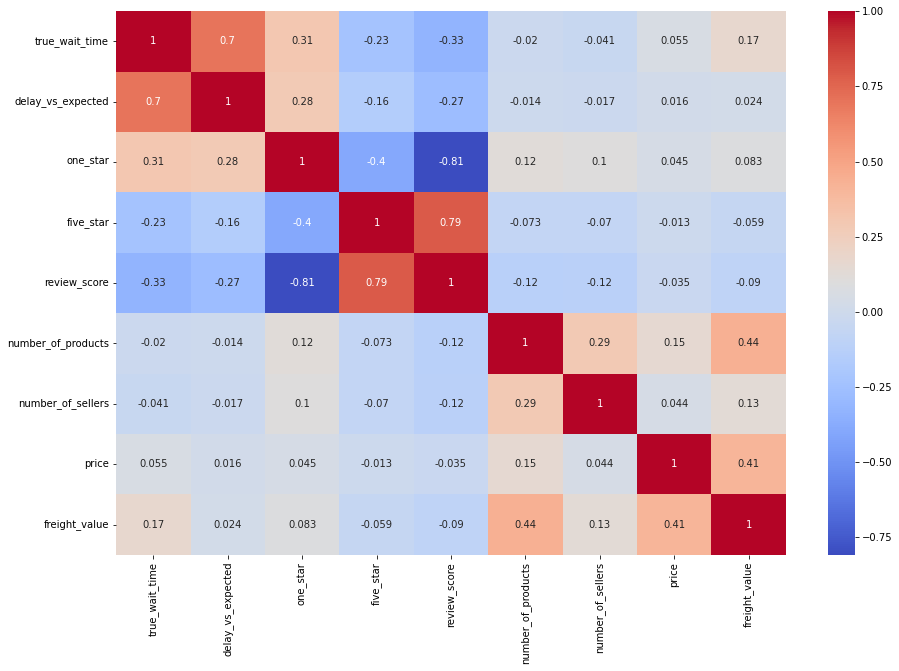

In [5]:
plt.figure(figsize = (15, 10))
sns.heatmap(orders.corr(), cmap = 'coolwarm', annot = True, )

In [6]:
# of courese, one_star is POSITIVELY and five star is NEGATIVELY correlated with true and expected wait time.
# in general, our modified review score (that takes into account fairly positive reviews now) has strong
# Negative correlation with wait time
# price, freight value, number of products and sellers have relatively weak correlation with review score. 


# simple regression models with seaborn regression

In [9]:
sample = orders.sample(10000, random_state=42)

<AxesSubplot:xlabel='true_wait_time', ylabel='review_score'>

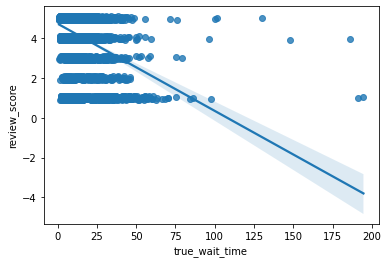

In [10]:
sns.regplot(x = sample.true_wait_time, y = sample.review_score, y_jitter = 0.1)

<AxesSubplot:xlabel='delay_vs_expected', ylabel='review_score'>

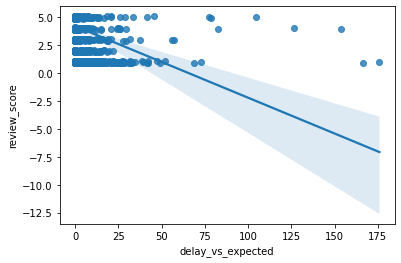

In [11]:
sns.regplot(x = sample.delay_vs_expected, y = sample.review_score, y_jitter = 0.1)

In [12]:
# these plots are not very intuitive, but we can test the hypothesis. First, let's check the slopes